<a href="https://colab.research.google.com/github/SofiMich/CE/blob/main/T3/T3_CE_Michaelian_1_AgenteViajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Agente viajero
El problema del agente viajero consiste en encontrar la ruta más corta que recorra todas las ciudades 

In [ ]:
import numpy as np
import pandas as pd
import math
import random

In [ ]:
import base64
import requests

archivo = "https://raw.githubusercontent.com/SofiMich/CE/main/T3/1_AgenteViajero/TSP%20datos.txt"
req = requests.get(archivo)
req = req.text
print(req)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
633 0 
257 390 0 
91  661 228 0 
412 227 169 383 0 
150 488 112 120 267 0 
80  572 196 77  351 63  0 
134 530 154 105 309 34  29  0
259 555 372 175 338 264 232 249 0 
505 289 262 476 196 360 444 402 495 0 
353 282 110 324 61  208 292 250 352 154 0 
324 638 437 240 421 329 297 314 95  578 435 0 
70  567 191 27  346 83  47  68  189 439 287 254 0 
211 466 74  182 243 105 150 108 326 336 184 391 145 0 
268 420 53  239 199 123 207 165 383 240 140 448 202 57  0
246 745 472 237 528 364 332 349 202 685 542 157 289 426 483 0 
121 518 142 84  297 35  29  36  236 390 238 301 55  96  153 336 0 




In [ ]:
def Reverse_Content(file):
      ofile=open(file,"r")
      k=ofile.readlines()
      t=reversed(k)
      for i in t:
           print(i.rstrip())

In [ ]:
distancias = pd.read_table('https://raw.githubusercontent.com/SofiMich/CE/main/T3/1_AgenteViajero/TSP%20datos.txt', dtype=float, header=None, sep='\s+').fillna(0).values

In [ ]:
def rellenar(matrizTriangular):
  for i in range(matrizTriangular.shape[0]):
    for j in range(i):
      matrizTriangular[j,i] = matrizTriangular[i,j]
  return matrizTriangular

In [ ]:
len(distancias)

17

In [ ]:
distancias = rellenar(distancias) 
for i in range(len(distancias)):
  print ('\t'.join(map(str, (distancias[i]).astype(int))))

0	633	257	91	412	150	80	134	259	505	353	324	70	211	268	246	121
633	0	390	661	227	488	572	530	555	289	282	638	567	466	420	745	518
257	390	0	228	169	112	196	154	372	262	110	437	191	74	53	472	142
91	661	228	0	383	120	77	105	175	476	324	240	27	182	239	237	84
412	227	169	383	0	267	351	309	338	196	61	421	346	243	199	528	297
150	488	112	120	267	0	63	34	264	360	208	329	83	105	123	364	35
80	572	196	77	351	63	0	29	232	444	292	297	47	150	207	332	29
134	530	154	105	309	34	29	0	249	402	250	314	68	108	165	349	36
259	555	372	175	338	264	232	249	0	495	352	95	189	326	383	202	236
505	289	262	476	196	360	444	402	495	0	154	578	439	336	240	685	390
353	282	110	324	61	208	292	250	352	154	0	435	287	184	140	542	238
324	638	437	240	421	329	297	314	95	578	435	0	254	391	448	157	301
70	567	191	27	346	83	47	68	189	439	287	254	0	145	202	289	55
211	466	74	182	243	105	150	108	326	336	184	391	145	0	57	426	96
268	420	53	239	199	123	207	165	383	240	140	448	202	57	0	483	153
246	745	472	237	528	364	332	349	202	685	542	157	

## 1.1 Codificació binaria
Para la codificación binaria de este problema necesitamos representar 17 ciudades, una de esas ciudaes será la ciudad de partida y de regreso. Para representar 17 valores diferentes, necesitamos 5 bits, así tendremos 32 valores diferentes, que podemos decodificar y lueo usar la función *módulo* para que esos 32 valores se traduzcan en solo 17.


In [ ]:
def pobBin(nInd = 60, n = 17, d = 5):
  pob = np.random.randint(0,2,(nInd,d*n)) #población inicial  
  return pob, n, d

In [ ]:
pobB, n, d = pobBin(60)
pobB

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
def codifBin(individuo, n = 17, d=5):
  x = []
  for i in range(n):
    x.append(individuo[i*d:(i+1)*d].dot(2**np.arange(individuo[i*d:(i+1)*d].size)[::-1])%n)
  return np.array(x)

In [ ]:
pobB, n, d = pobBin(60)
x = codifBin(pobB[0])
print(x)

[ 1  4  0  0  0  2  5 15  0  2 14 14 12 12  7 16  5]


Como podemos observar, con esta codificación tenemos lgunas ciudades repetidas, lo cual es indeseable en nuestra solución. Tenemos dos opciones para evitar esto: 
1. Penalizar a los individuos que tienen ciudades repetidas al momento de hacer la evaluación.
2. "Purgar" a cada individuo sustituyendo los valores repetidos por aquellos que no se encuentran en el genotipo.
La primer estrategia es la más fácil de implemtentar y es la que usaré, ya que la segunda, además de tomar más tiempo de cómputo, requiere de un paso de volver a codificar en binario.

In [ ]:
# def purgar(individuo):
#   # Obtener los valores únicos y las veces que se repiten
#     unq,c = np.unique(individuo,return_counts=1)
#     print(c-1)

#     # Generamos una máscara de coincidencias entre el idividuo y los genes que se repiten
#     m = np.isin(individuo,unq[c>1])

#     # Obtenemos los valores que hacen falta en el arreglo original
#     newvals = np.setdiff1d(np.arange(len(individuo)),individuo[~m])
#     np.random.shuffle(newvals)

#     # Asignamos los valores que faltan a las entradas que están duplicadas
#     individuo[m] = newvals
#     return individuo

##1.2 Codificación entera
Para la codificación entera representaremos cada ciudad como un número entre 0 y 16, y cada individuo entonces será una permutación de esos 17 números. 

Generamos nuestra población inicial:

In [ ]:
def pobEnt(nInd = 60):
  n = 17 #número de ciudades
  d = 1 # número de dígitos

  pob = np.zeros((nInd,n*d), dtype=int)
  for i in range(nInd):
    pob[i] = np.random.permutation(n) 

  return pob, n, d

In [ ]:
def codifEnt(individuo, n = 17, d=1):
  return individuo

In [ ]:
pobE, n, d= pobEnt(60)

In [ ]:
pobE

array([[ 9,  7,  3, ...,  5, 11,  0],
       [ 6,  7, 16, ...,  0,  3, 13],
       [16, 12, 15, ...,  7, 13,  5],
       ...,
       [ 3,  2,  5, ...,  9,  0, 11],
       [12,  9,  4, ..., 10,  8,  1],
       [ 0, 14,  7, ..., 13,  2, 16]])

##1.2 Codificación real
Para la codificación real

### Evaluar la población

In [ ]:
def evaluar(pob, codif):
  camino = []

  for individuo in pob:
    individuo = codif(individuo)
    distancia = 0

    for i in range(individuo.size - 1):
      x = int(individuo[i])
      y = int(individuo[i+1])
      distancia = distancia + distancias[x, y]

    x = int(individuo[-1])
    y = int(individuo[0])
    distancia = distancia + distancias[x,y]

    # Penalización por ciudades repetidas
    unq,c = np.unique(individuo,return_counts=1)
    distancia = distancia + np.sum(c-1)*np.max(distancias)

    individuo = np.append(individuo.astype(int), distancia)
    camino.append(individuo)

  return np.array(camino)

In [ ]:
pobEvaluada = evaluar(pobB,codifBin)
pobEvaluada

array([[1.0000e+00, 4.0000e+00, 0.0000e+00, ..., 1.6000e+01, 5.0000e+00,
        7.9720e+03],
       [8.0000e+00, 1.0000e+00, 4.0000e+00, ..., 5.0000e+00, 1.2000e+01,
        7.3040e+03],
       [6.0000e+00, 1.4000e+01, 1.0000e+01, ..., 5.0000e+00, 0.0000e+00,
        6.3230e+03],
       ...,
       [8.0000e+00, 8.0000e+00, 5.0000e+00, ..., 7.0000e+00, 5.0000e+00,
        8.6100e+03],
       [4.0000e+00, 9.0000e+00, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        8.3350e+03],
       [7.0000e+00, 1.0000e+01, 9.0000e+00, ..., 1.1000e+01, 9.0000e+00,
        1.0451e+04]])

### Calcular Fitness

In [ ]:
def calcularFitness(pob):
  total = np.sum(pob, axis = 0)[-1]

  for i in pob:
    i[-1] = np.abs(1 - i[-1]/total)

  return pob

In [ ]:
pobEvaluada = calcularFitness(pobEvaluada)
pobEvaluada

array([[ 1.        ,  4.        ,  0.        , ..., 16.        ,
         5.        ,  0.98523291],
       [ 8.        ,  1.        ,  4.        , ...,  5.        ,
        12.        ,  0.98647029],
       [ 6.        , 14.        , 10.        , ...,  5.        ,
         0.        ,  0.98828747],
       ...,
       [ 8.        ,  8.        ,  5.        , ...,  7.        ,
         5.        ,  0.9840511 ],
       [ 4.        ,  9.        ,  9.        , ...,  0.        ,
         0.        ,  0.9845605 ],
       [ 7.        , 10.        ,  9.        , ..., 11.        ,
         9.        ,  0.98064088]])

### Calcular probabilidad de selección

In [ ]:
def calcularPS(x):
  total = np.sum(x, axis = 0)[-1]
  
  for i in x:
    if i[-1]/total >= 0:
        i[-1] = i[-1]/total
    else:
        print('Probabilidad negativa!!!')
        print(i)
        i[-1] = np.nextafter(0,1)
  return x

In [ ]:
pobEvaluada = calcularPS(pobEvaluada)
print(np.sum(pobEvaluada[:,-1], axis = 0) )#para checar que la suma de las probabilidades sí den 1
#print(pobEvaluada)


1.0


### Seleccionar individuos para el pool de cruza

In [ ]:
def seleccionar(x,pob):
  pool = []
  for i in range(len(pob)):
    r = np.random.choice(range(len(pob)), p=x[:,-1])

    pool.append(pob[r])
  
  pool = np.array(pool)

  return pool

In [ ]:
pool = seleccionar(pobEvaluada,pobB)
pool

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 1]])

### Cruza

Cruza en la codifcación entera:

In [ ]:
def cruzaEnt(pool, pc):
  nuevaGen = np.zeros((len(pool),len(pool[1])))

  l = len(pool[1])

  for i in range(len(pool)//2):
    hijo1 = -np.ones(l)
    hijo2 = -np.ones(l)
    
    padre1 = pool[2*i]
    padre2 = pool[2*i+1]
    r = random.uniform(0,1)

    if r <= pc:

      n1 = random.randint(0,l)
      n2 = random.randint(0,l)
      cruce1 = min(n1,n2)
      cruce2 = max(n1,n2)
      
     
      hijo1[cruce1:cruce2] = padre1[cruce1:cruce2]

      res2 = [item for item in padre2 if item not in hijo1]
     
      hijo1[0:cruce1] = res2[0:cruce1]
      
      hijo1[cruce2:] = res2[cruce1:]
      
      hijo2[cruce1:cruce2] = padre2[cruce1:cruce2]
      res1 = [item for item in padre1 if item not in hijo2]

      hijo2[0:cruce1] = res1[0:cruce1]
      hijo2[cruce2:] = res1[cruce1:]
    
    else:
      hijo1 = padre1
      hijo2 = padre2

    nuevaGen[2*i] = hijo1
    nuevaGen[2*i+1] = hijo2

  return np.array(nuevaGen)
    

Cruza en la codificación Binaria:

In [ ]:
def cruzaBin(pool,pc=1):
  nuevaGen = np.zeros((len(pool),len(pool[1])))

  l = len(pool[1])

  hijo1 = np.zeros(l)
  hijo2 = np.zeros(l)

  for i in range(len(pool)//2):
    padre1 = pool[2*i]
    padre2 = pool[2*i+1]
    r = random.uniform(0,1)

    if r <= pc:

      cruce = random.randint(0,l)
      #print(cruce)

      hijo1[0:cruce] = padre1[0:cruce]
      hijo1[cruce:l] = padre2[cruce:l]

      hijo2[0:cruce] = padre2[0:cruce]
      hijo2[cruce:l] = padre1[cruce:l]
    
    else:
      hijo1 = padre1
      hijo2 = padre2

    nuevaGen[2*i] = hijo1
    nuevaGen[2*i+1] = hijo2

  return np.array(nuevaGen)

In [ ]:
nuevaGen = cruzaBin(pool,1)
nuevaGen

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 1.]])

### Mutación

Mutación en la codificación entera usando dos puntos:

In [ ]:
def mutarEnt(nuevaGen,pm = 1):
  prob = random.uniform(np.nextafter(0,1),1.0)
  l = len(nuevaGen[0])

  for i in range(len(nuevaGen)):
    if prob <= pm:
      n1 = random.randint(0,l-1)
      n2 = random.randint(0,l-1)

      #print(i, n1)
      #print(nuevaGen.shape)

      temp = nuevaGen[i,n1]
      nuevaGen[i,n1] = nuevaGen[i,n2]
      nuevaGen[i,n2] = temp

  return np.array(nuevaGen)

Muta en la codificación binaria:

In [ ]:
def mutarBin(nuevaGen,pm):
  #pm = 1/(2*nuevaGen.shape[1])
  for i in range(len(nuevaGen)):
    for j in range(len(nuevaGen[i])):
      num = random.uniform(np.nextafter(0,1),1.0)
      if num <= pm:
        if nuevaGen[i,j] == 0:
          nuevaGen[i,j] = 1
        else:
          nuevaGen[i,j] = 0

  return np.array(nuevaGen)

In [ ]:
mutarBin(nuevaGen,1)

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
def minimizar(poblacion, nInd, ngeneraciones, pc, pm, codif, cruzar, mutar, nombre):
  
  pob, n, d = poblacion(nInd)
  
  mejor = []  
  promedio = np.zeros(ngeneraciones)

  for i in range(ngeneraciones):

    x = evaluar(pob,codif)

    mejor.append(pob[np.where(x[:,-1] == np.min(x[:,-1]))][0]) #guardamos al insividuo con el mejor desempeño
    #print(mejor[i])
  
    promedio[i] = np.sum(x, axis = 0)[-1] / len(pob) #calculamos el promedio del desempeño de la población

    x = calcularPS(calcularFitness(x))
 
    pool = seleccionar(x,pob)
    nuevaGen =  cruzar(pool,pc)
    mutar(nuevaGen,pm)

    #Elitismo:
    k = np.random.randint(0,len(pob))
    nuevaGen[k] = mejor[i]
    #print(mejor[i])

    pob = nuevaGen

  mejor = np.array(mejor)
  print('El camino mínimo es:' )
  print(evaluar(pob,codif)[-1,:-1].astype('int'))
  print('De longitud:')
  print(evaluar(mejor,codif)[-1:,-1])

# Graficar
  import matplotlib.pyplot as plt

  plt.axes(xlabel='Generación', ylabel= nombre + str(n) + 'D (x)')
  plt.title('Desempeño ' + str(nInd) + ' individuos en ' +str(ngeneraciones) + ' generaciones\n Con elitismo de 1 individuo')

  plt.plot(promedio)
  plt.plot(evaluar(mejor,codif)[:,-1])
  #print(evaluar(mejor,codif))

  plt.legend(labels=["Promedio","Mejor individuo"])
  plt.show


In [ ]:
nGen = 2000
pc = 0.5
pm = 0.0001
nInd = 60

El camino mínimo es:
[14 16  2 13 10  4  4  8 15 11  7 12  6  0  3  5 13]
De longitud:
[3096.]


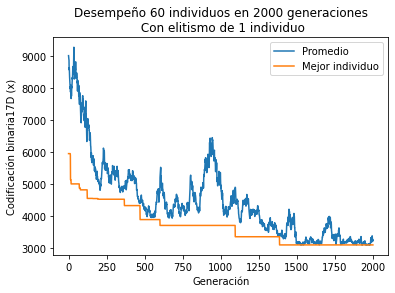

In [ ]:
minimizar(pobBin, nInd, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

In [ ]:
nGen = 2000
pc = 0.5
pm = 0.001
nInd = 100

El camino mínimo es:
[ 0  6  7 13 14  5 15  8 12  2  5  4  2  9  9 12  3]
De longitud:
[3154.]


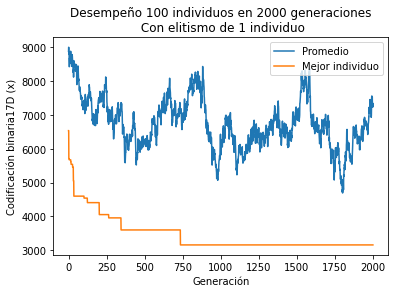

In [ ]:
minimizar(pobBin, nInd, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

In [ ]:
nGen = 2000
pc = 0.5
pm = 0.0001
nInd = 60

El camino mínimo es:
[ 8 11 15  0  2 10  4  1  9 14 13  7  6 16  5 12  3]
De longitud:
[2225.]


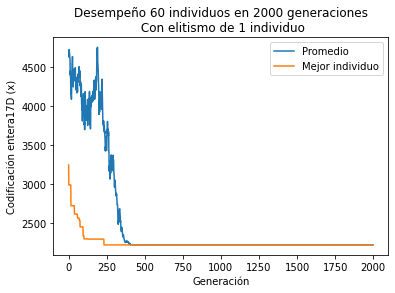

In [ ]:
minimizar(pobEnt, 60, nGen, pc, pm, codifEnt, cruzaEnt, mutarEnt, 'Codificación entera')

In [ ]:
nGen = 2000
pc = 0.5
pm = 1.0/60.0
nInd = 500

El camino mínimo es:
[ 0 16  8  2  9  7  5  6  7 15 15  9  8  4  7  1  8]
De longitud:
[3327.]


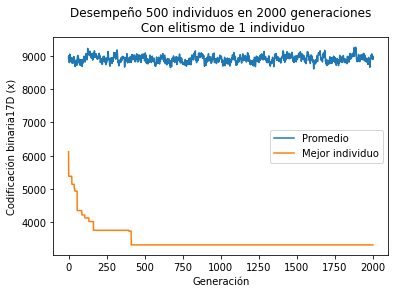

In [ ]:
minimizar(pobBin, nInd, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

El camino mínimo es:
[15  6  6 11  9  4 11  8  3  8  1  6  1  3  2 10 13]
De longitud:
[3206.]


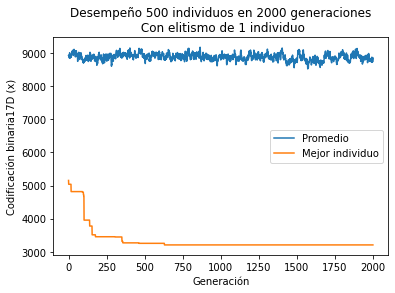

In [ ]:
minimizar(pobBin, nInd, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')